### Blank nlp pipeline

In [3]:
import spacy
nlp = spacy.blank('en')
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")
for tok in doc:
    print(tok)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


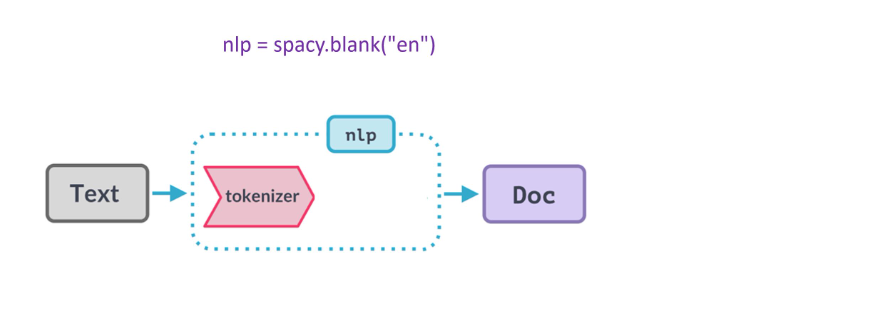

In [5]:
nlp.pipe_names

[]

### Download trained pipeline

In [18]:
!python -m spacy download en_core_web_lg 



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [19]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [21]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [22]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x17290a12b80>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x17290a12fa0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1729086a200>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x17290a2e8c0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x17290a23100>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1729086a040>)]

Further instructions on : https://spacy.io/usage/models#quickstart

In [23]:
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token, " | ", spacy.explain(token.pos_), " | ", token.lemma_)

Captain  |  proper noun  |  Captain
america  |  proper noun  |  america
ate  |  verb  |  eat
100  |  numeral  |  100
$  |  symbol  |  $
of  |  adposition  |  of
samosa  |  proper noun  |  samosa
.  |  punctuation  |  .
Then  |  adverb  |  then
he  |  pronoun  |  he
said  |  verb  |  say
I  |  pronoun  |  I
can  |  auxiliary  |  can
do  |  verb  |  do
this  |  pronoun  |  this
all  |  determiner  |  all
day  |  noun  |  day
.  |  punctuation  |  .


In [24]:
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token, " | ", token.pos_, " | ", token.lemma_)

Captain  |  PROPN  |  Captain
america  |  PROPN  |  america
ate  |  VERB  |  eat
100  |  NUM  |  100
$  |  SYM  |  $
of  |  ADP  |  of
samosa  |  PROPN  |  samosa
.  |  PUNCT  |  .
Then  |  ADV  |  then
he  |  PRON  |  he
said  |  VERB  |  say
I  |  PRON  |  I
can  |  AUX  |  can
do  |  VERB  |  do
this  |  PRON  |  this
all  |  DET  |  all
day  |  NOUN  |  day
.  |  PUNCT  |  .


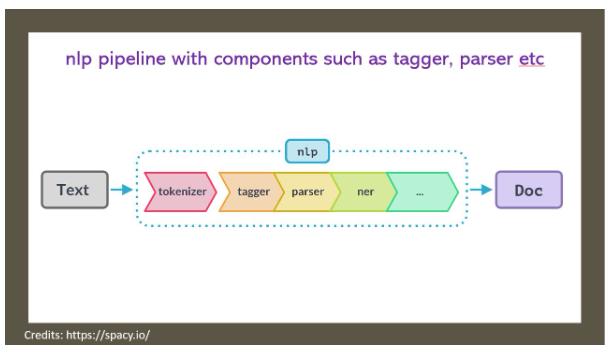

### Named Entity Recognition


In [25]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent)

Tesla Inc
$45 billion


In [27]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

Tesla Inc ORG
$45 billion MONEY


In [28]:
from spacy import displacy
displacy.render(doc, style='ent')

### Adding a component to a blank pipeline


In [32]:
source_nlp = spacy.load("en_core_web_lg")

nlp = spacy.blank("en")
nlp.add_pipe("ner", source=source_nlp)
nlp.pipe_names

['ner']